In [17]:
import numpy as np
import os
import scipy.io as sio
import matplotlib.pyplot as plt

In [32]:
config = {}
config['save_dir'] = 'results-pre-overtraining'
config['save_name'] = '0_0_0_0.001000_0.900000_0.999000_runType.Full_matrices-test'

config['save_dir'] = '2023-08-01T17:43:58_plain'

config['save_dir'] = 'results-pre-overtraining/nocl-seed0'
config['save_dir'] = 'results-pre-overtraining/proj-seed0'

In [33]:
if os.path.exists(os.path.join('data', config['save_dir'], 'images_all.npy')):
    # read from images_all.npy
    images_all = np.load(os.path.join('data', config['save_dir'], 'images_all.npy'))
else:
    # create images_all
    images_data = []
    for taskIndex in range(1, 31):
        filename = os.path.join('data', config['save_dir'], 'saved', str(taskIndex)+'.mat')
        mat = sio.loadmat(filename)
        images_data.append(mat['images'])
    images_all = np.array(images_data).reshape((30, 2, -1))

Option: Distance

[1.243851271836053, 1.1758471616347472, 1.3961500760886056, 1.4969650980641616, 1.298827580694972, 1.256966189953062, 1.3882535118534118, 1.4999115435285026, 1.7267471409149584, 1.173903497453121, 1.503702604811473, 1.2607431261386255, 1.073012837968708, 1.2931865390561714, 1.515863562874929, 1.5355534780808044, 1.1255166584093652, 1.3754515481781087, 1.5800756054995877, 1.4450454291652606, 1.351191966969189, 1.2735432196628655, 1.125167123724142, 1.5134108374543815, 1.6694345038118643, 1.5144189670256658, 1.492968092921266, 1.4572172877575087, 1.6449555495422896]
29


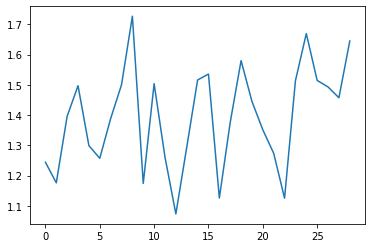

In [34]:
import numpy as np

distances = []
for i in range(1, len(images_all)):
    # 提取前后两对图像
    prev_pair, curr_pair = images_all[i-1], images_all[i]

    # 计算两对图像之间的距离
    dist_avg = 0
    for img_prev, img_curr in zip(prev_pair, curr_pair):
        distance = np.linalg.norm(img_curr - img_prev)
        dist_avg += distance
    dist_avg /= 2
    distances.append(dist_avg)

# distances 现在是包含连续图像对之间距离的列表
print(distances)
print(len(distances))

plt.plot(distances)

Option: Cosine

[0.9351049774692972, 1.2690185977960813, 0.7130943275037938, 0.8830698233563657, 1.2628747190513574, 0.6546720589991166, 1.0541226940729203, 1.2237032892892996, 1.361707781198729, 0.8972965426005934, 1.2386363091687749, 0.6298097060093916, 0.7109381948606067, 1.1361439098287547, 0.9128254652128548, 1.3994492470567457, 0.7797301990978955, 1.2495557278172706, 1.5115435242787911, 1.314694203614755, 1.2011422844864288, 0.6710421899470775, 0.6370391151419137, 1.7035809246895868, 1.2080556472418553, 1.089237494080765, 1.3913123275506916, 1.3306489424213217, 1.557226253336887]


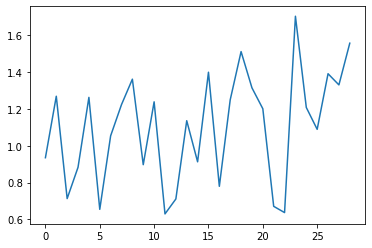

In [35]:
import numpy as np
from scipy.spatial.distance import cosine

cos_distances = []
for i in range(1, len(images_all)):
    # 提取前后两对图像中的第一个图像
    img_prev, img_curr = images_all[i-1][0], images_all[i][0]
    
    # 计算两图像之间的余弦距离
    cos_distance = cosine(img_curr, img_prev)
    cos_distances.append(cos_distance)

# cos_distances 现在是包含连续图像对之间余弦距离的列表
print(cos_distances)
plt.plot(cos_distances)

-0.15605209801488773

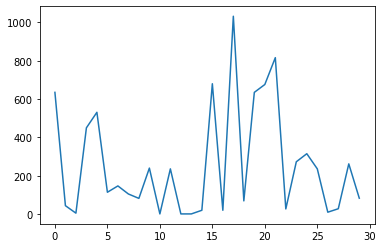

In [45]:
conv_f = os.path.join('data', config['save_dir'], 'conv.txt')
conv = np.loadtxt(conv_f)
plt.plot(conv)
np.corrcoef([0]+distances, conv)[0,1]